In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [9]:
df = pd.read_csv('../data/FullDataset.csv')
# dirty_freight_df = pd.read_csv('../data/Baltic Dirty Tanker Historical Data.csv')

# df['Freight_Price'] = dirty_freight_df['Price'].replace(',', '', regex=True).astype(float)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

df['Month'] = df['Date'].dt.month
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

df.sort_values(by="Date", inplace=True)
df.set_index("Date", inplace=True)

df.index.freq = 'MS'
df

,Freight_Price,Oil_Price,crisis_COVID-19 oil crash,crisis_Dot-com crash,crisis_Global financial crisis,crisis_Inflation and rate hikes,crisis_Oil price collapse,crisis_None,war_Arab Spring,war_Crimea crisis,...,war_Ukraine War,war_None,sanctions_Iran sanctions,sanctions_Russia sanctions,sanctions_None,pandemic_COVID-19,pandemic_None,Month,month_sin,month_cos
Date,,,,,,,,,,,,,,,,,,,,,
2002-06-01,733.0,25.58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6,1.224647e-16,-1.000000e+00
2002-07-01,742.0,25.44,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7,-5.000000e-01,-8.660254e-01
2002-08-01,728.0,27.47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,8,-8.660254e-01,-5.000000e-01
2002-09-01,683.0,28.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,9,-1.000000e+00,-1.836970e-16
2002-10-01,721.0,25.72,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,10,-8.660254e-01,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,663.0,71.84,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,11,-5.000000e-01,8.660254e-01
2024-12-01,625.0,74.24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,12,-2.449294e-16,1.000000e+00
2025-01-01,662.0,75.67,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,5.000000e-01,8.660254e-01


In [10]:
df['Freight_Price(t-1)'] = df['Freight_Price'].shift(1)
df['Freight_Price(t-6)'] = df['Freight_Price'].shift(6)
df['Freight_Price(t-12)'] = df['Freight_Price'].shift(12)
df['Freight_Price(t-24)'] = df['Freight_Price'].shift(24)

df['Oil_Price(t-1)'] = df['Oil_Price'].shift(1)
df['Oil_Price(t-6)'] = df['Oil_Price'].shift(6)
df['Oil_Price(t-12)'] = df['Oil_Price'].shift(12)
df['Oil_Price(t-24)'] = df['Oil_Price'].shift(24)

# df['Freight_Price_roll_3']  = df['Freight_Price'].rolling(window=3).mean()
# df['Freight_Price_roll_6']  = df['Freight_Price'].rolling(window=6).mean()
# df['Freight_Price_roll_12'] = df['Freight_Price'].rolling(window=12).mean()

# df['Oil_Price_roll_3']  = df['Oil_Price'].rolling(window=3).mean()
# df['Oil_Price_roll_6']  = df['Oil_Price'].rolling(window=6).mean()
# df['Oil_Price_roll_12'] = df['Oil_Price'].rolling(window=12).mean()


# df['Freight_Price(t+1)'] = df['Freight_Price'].shift(-1)

# df = df.drop(['Freight_Price(t-1)', 'Freight_Price(t-6)', 'crisis_None', 'sanctions_None', 'month_sin', 'war_None'], axis=1)
df = df.dropna()

X = df.drop(columns=['Freight_Price'])
y = df['Freight_Price']

In [11]:
X

,Oil_Price,crisis_COVID-19 oil crash,crisis_Dot-com crash,crisis_Global financial crisis,crisis_Inflation and rate hikes,crisis_Oil price collapse,crisis_None,war_Arab Spring,war_Crimea crisis,war_Iraq War,...,month_sin,month_cos,Freight_Price(t-1),Freight_Price(t-6),Freight_Price(t-12),Freight_Price(t-24),Oil_Price(t-1),Oil_Price(t-6),Oil_Price(t-12),Oil_Price(t-24)
Date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,34.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.224647e-16,-1.000000e+00,1100.0,1099.0,874.0,733.0,36.58,30.17,28.33,25.58
2004-07-01,40.03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-5.000000e-01,-8.660254e-01,1113.0,1327.0,1095.0,742.0,34.50,29.18,28.37,25.44
2004-08-01,39.61,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-8.660254e-01,-5.000000e-01,1025.0,1469.0,1049.0,728.0,40.03,32.23,29.49,27.47
2004-09-01,46.38,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.000000e+00,-1.836970e-16,1032.0,1042.0,888.0,683.0,39.61,31.51,27.61,28.75
2004-10-01,48.98,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-8.660254e-01,5.000000e-01,1057.0,908.0,840.0,721.0,46.38,34.48,27.70,25.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,71.84,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-5.000000e-01,8.660254e-01,523.0,1023.0,834.0,1816.0,72.81,81.11,80.86,86.97
2024-12-01,74.24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-2.449294e-16,1.000000e+00,663.0,834.0,960.0,2135.0,71.84,85.00,77.04,85.65
2025-01-01,75.67,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.000000e-01,8.660254e-01,625.0,778.0,1208.0,643.0,74.24,80.84,81.71,85.46


In [12]:
y

Date
2004-06-01    1113.0
2004-07-01    1025.0
2004-08-01    1032.0
2004-09-01    1057.0
2004-10-01    1757.0
               ...  
2024-11-01     663.0
2024-12-01     625.0
2025-01-01     662.0
2025-02-01     670.0
2025-03-01     660.0
Freq: MS, Name: Freight_Price, Length: 250, dtype: float64

In [13]:
split = int(0.8 * len(X))
X_train, X_test = X[:-24], X[-24:]
y_train, y_test = y[:-24], y[-24:]


gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = root_mean_squared_error(y_test, y_pred_gbr)


print(f"Gradient Boosting Regressor - MAE: {mae_gbr}, MSE: {mse_gbr}, R2: {r2_gbr}, RMSE: {rmse_gbr}")

Gradient Boosting Regressor - MAE: 149.64698112207535, MSE: 31883.28816948965, R2: -0.07281829859883104, RMSE: 178.55892072223568


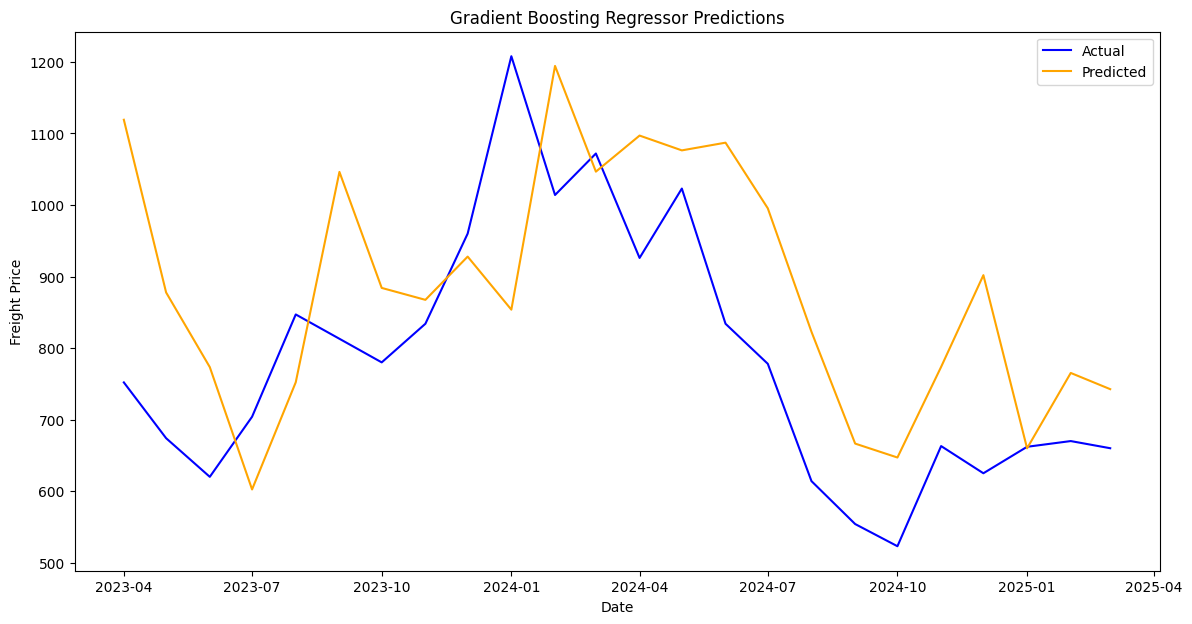

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_gbr, label='Predicted', color='orange')
plt.title('Gradient Boosting Regressor Predictions')
plt.xlabel('Date')
plt.ylabel('Freight Price')
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.015, 0.025, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.6 ,0.8, 1.0],
}

tscv = TimeSeriesSplit(n_splits=4)

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error', 
                           cv=tscv,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:")
print(grid_search.best_params_)

best_gbr = grid_search.best_estimator_

y_pred_best = best_gbr.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
rmse_gbr_best = root_mean_squared_error(y_test, y_pred_best)

print(f"Градиентный Бустинг с лучшими гиперпараметрами - MAE: {mae_best}, MSE: {mse_best}, R2: {r2_best}, RMSE: {rmse_gbr_best}")

Лучшие гиперпараметры:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 25, 'subsample': 0.6}
Градиентный Бустинг с лучшими гиперпараметрами - MAE: 112.0120002622787, MSE: 18616.12326565288, R2: 0.3735991851845586, RMSE: 136.44091492529975


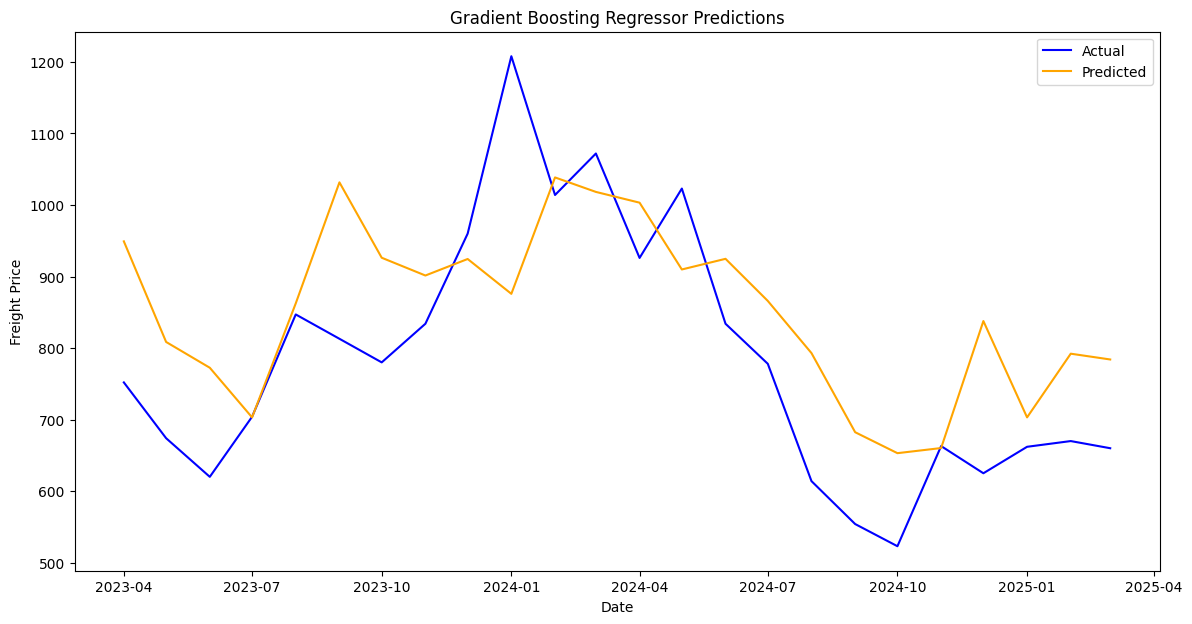

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_best, label='Predicted', color='orange')
plt.title('Gradient Boosting Regressor Predictions')
plt.xlabel('Date')
plt.ylabel('Freight Price')
plt.legend()
plt.show()

In [17]:
xgb1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=15, random_state=42)
xgb1.fit(X_train, y_train)
y_pred_xgb = xgb1.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor - MAE: {mae_xgb}, MSE: {mse_xgb}, R2: {r2_xgb}")

XGBoost Regressor - MAE: 150.2661616007487, MSE: 46232.94770585295, R2: -0.5556598815446403


In [18]:
param_grid = {
    'n_estimators': [25, 50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.015, 0.025, 0.05, 0.1],
    'max_depth': [3, 4, 5, 10, 15, 20],
    'subsample': [0.6 ,0.8, 1.0],
}

xgb2 = xgb.XGBRegressor(random_state=42)

grid_search_xgb = GridSearchCV(estimator=xgb2,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

print(f"Лучшие гиперпараметры XGBoost: {grid_search_xgb.best_params_}")
best_xgb = grid_search_xgb.best_estimator_

y_pred_best_xgb = best_xgb.predict(X_test)

mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
print(f"XGBoost с лучшими гиперпараметрами - MAE: {mae_best_xgb}, MSE: {mse_best_xgb}, R2: {r2_best_xgb}")

Лучшие гиперпараметры XGBoost: {'learning_rate': 0.025, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
XGBoost с лучшими гиперпараметрами - MAE: 109.44490051269531, MSE: 19519.78984767478, R2: 0.3431923450910366


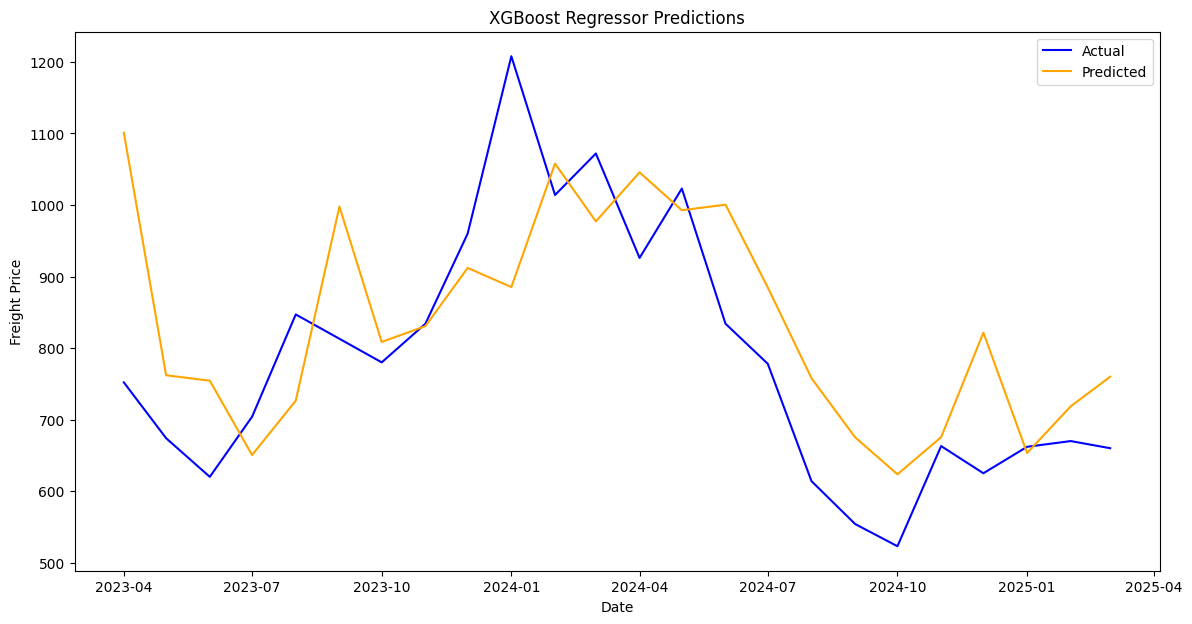

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_best_xgb, label='Predicted', color='orange')
plt.title('XGBoost Regressor Predictions')
plt.xlabel('Date')
plt.ylabel('Freight Price')
plt.legend()
plt.show()

In [20]:
lgb1 = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb1.fit(X_train, y_train)
y_pred_lgb = lgb1.predict(X_test)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Regressor - MAE: {mae_lgb}, MSE: {mse_lgb}, R2: {r2_lgb}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 226, number of used features: 20
[LightGBM] [Info] Start training from score 786.898230
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [21]:
lgb_param_grid = {
    'n_estimators': [25, 50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.015, 0.025, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 10],
    'subsample': [0.8, 1.0]
}

lgb3 = lgb.LGBMRegressor(random_state=42)
grid_search_lgb3 = GridSearchCV(estimator=lgb3,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)
grid_search_lgb3.fit(X_train, y_train)
print(f"Лучшие гиперпараметры LightGBM: {grid_search_lgb3.best_params_}")
best_lgb3 = grid_search_lgb3.best_estimator_
y_pred_best_lgb = best_lgb3.predict(X_test)
mae_best_lgb = mean_absolute_error(y_test, y_pred_best_lgb)
mse_best_lgb = mean_squared_error(y_test, y_pred_best_lgb)
r2_best_lgb = r2_score(y_test, y_pred_best_lgb)
print(f"LightGBM с лучшими гиперпараметрами - MAE: {mae_best_lgb}, MSE: {mse_best_lgb}, R2: {r2_best_lgb}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 226, number of used features: 20
[LightGBM] [Info] Start training from score 786.898230
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

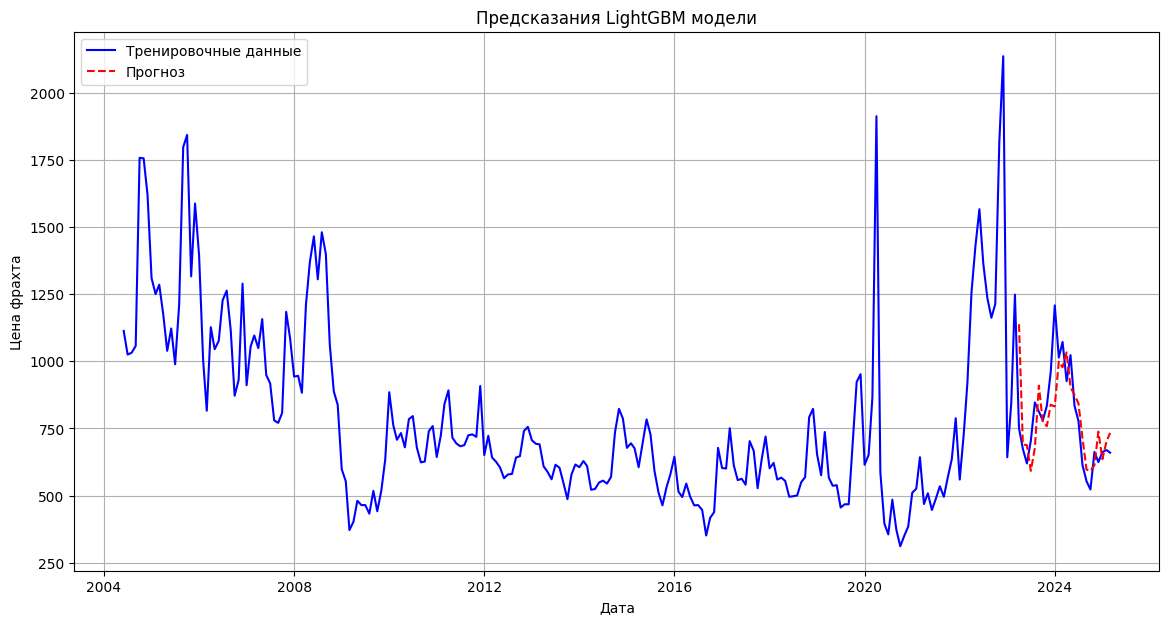

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(y.index, y, label='Тренировочные данные', color='blue')
plt.plot(y_test.index, y_pred_best_lgb, label='Прогноз', color='red', linestyle='--')
plt.title('Предсказания LightGBM модели')
plt.xlabel('Дата')
plt.ylabel('Цена фрахта')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
sqrt_mse_gbr = np.sqrt(mse_gbr)
sqrt_mse_xgb = np.sqrt(mse_xgb)
sqrt_mse_lgb = np.sqrt(mse_lgb)
print(f"RMSE Gradient Boosting: {sqrt_mse_gbr}")
print(f"RMSE XGBoost: {sqrt_mse_xgb}")
print(f"RMSE LightGBM: {sqrt_mse_lgb}")

RMSE Gradient Boosting: 178.55892072223568
RMSE XGBoost: 215.01848224246433
RMSE LightGBM: 151.5171941846961


In [24]:
print(f"[MAE] GBR, XGBoost, LightGBM: {mae_gbr:.3f}, {mae_best_xgb:.3f}, {mae_best_lgb:.3f}\n " + 
      f"[MSE] GBR, XGBoost, LightGBM: {mse_best:.3f}, {mse_best_xgb:.3f}, {mse_best_lgb:.3f}\n" +
      f"[RMSE] GBR, XGBoost, LightGMB: {sqrt_mse_gbr:.3f}, {sqrt_mse_xgb:.3f}, {sqrt_mse_lgb:.3f}")

[MAE] GBR, XGBoost, LightGBM: 149.647, 109.445, 98.991
 [MSE] GBR, XGBoost, LightGBM: 18616.123, 19519.790, 18582.615
[RMSE] GBR, XGBoost, LightGMB: 178.559, 215.018, 151.517


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

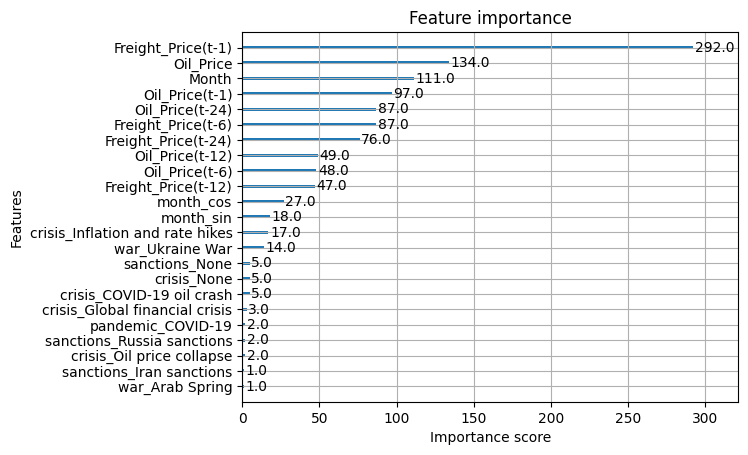

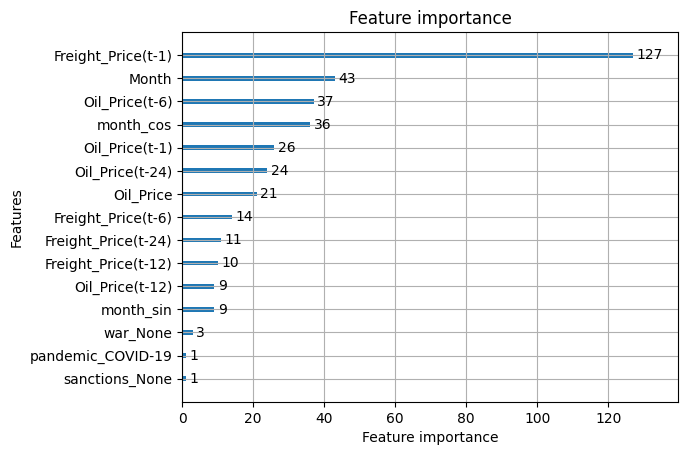

In [25]:
xgb.plot_importance(best_xgb, importance_type='weight')
lgb.plot_importance(best_lgb3)


In [26]:
# df_to_predict = pd.read_csv('../data/FullDataset_Extended_to_2027.csv')

# df_to_predict["Date"] = pd.to_datetime(df_to_predict["Date"], format="%Y-%m-%d")

# df_to_predict['Month'] = df_to_predict['Date'].dt.month
# df_to_predict['month_sin'] = np.sin(2 * np.pi * df_to_predict['Month'] / 12)
# df_to_predict['month_cos'] = np.cos(2 * np.pi * df_to_predict['Month'] / 12)

# df_to_predict.sort_values(by="Date", inplace=True)
# df_to_predict.set_index("Date", inplace=True)

# df_to_predict.index.freq = 'MS'

In [27]:
# df_to_predict['Freight_Price(t-1)'] = df_to_predict['Freight_Price'].shift(1)
# df_to_predict['Freight_Price(t-6)'] = df_to_predict['Freight_Price'].shift(6)
# df_to_predict['Freight_Price(t-12)'] = df_to_predict['Freight_Price'].shift(12)
# df_to_predict['Freight_Price(t-24)'] = df_to_predict['Freight_Price'].shift(24)

# df_to_predict['Oil_Price(t-1)'] = df_to_predict['Oil_Price'].shift(1)
# df_to_predict['Oil_Price(t-6)'] = df_to_predict['Oil_Price'].shift(6)
# df_to_predict['Oil_Price(t-12)'] = df_to_predict['Oil_Price'].shift(12)
# df_to_predict['Oil_Price(t-24)'] = df_to_predict['Oil_Price'].shift(24)

# df_to_predict = df_to_predict.dropna()

# X_to_predict = df_to_predict.drop(columns=['Freight_Price'])
# X_to_predict = X_to_predict.iloc[-24:]

In [28]:
# forecast = best_lgb3.predict(X_to_predict)

In [29]:
# plt.figure(figsize=(14, 7))
# plt.plot(y.index, y, label='Фрахт', color='blue')
# plt.plot(df_to_predict.index[-24:], forecast, label='Прогноз', color='red')
# plt.title('LightGBM прогноз на 2025-2027')
# plt.xlabel('Дата')
# plt.ylabel('Цена фрахта')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
df = df.loc['2010-01-01': '2019-01-01']
split = int(0.8 * len(X))
X = df.drop(columns=['Freight_Price'])
y = df['Freight_Price']
X_train, X_test = X[:-24], X[-24:]
y_train, y_test = y[:-24], y[-24:]
lgb_param_grid = {
    'n_estimators': [25, 50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.015, 0.025, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 10],
    'subsample': [0.8, 1.0]
}

lgb3 = lgb.LGBMRegressor(random_state=42)
grid_search_lgb3 = GridSearchCV(estimator=lgb3,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)
grid_search_lgb3.fit(X_train, y_train)
print(f"Лучшие гиперпараметры LightGBM: {grid_search_lgb3.best_params_}")
best_lgb3 = grid_search_lgb3.best_estimator_
y_pred_best_lgb = best_lgb3.predict(X_test)
mae_best_lgb = mean_absolute_error(y_test, y_pred_best_lgb)
mse_best_lgb = mean_squared_error(y_test, y_pred_best_lgb)
r2_best_lgb = r2_score(y_test, y_pred_best_lgb)
print(f"LightGBM с лучшими гиперпараметрами на норм отрезке - MAE: {mae_best_lgb}, MSE: {mse_best_lgb}, R2: {r2_best_lgb}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 85, number of used features: 17
[LightGBM] [Info] Start training from score 639.423529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

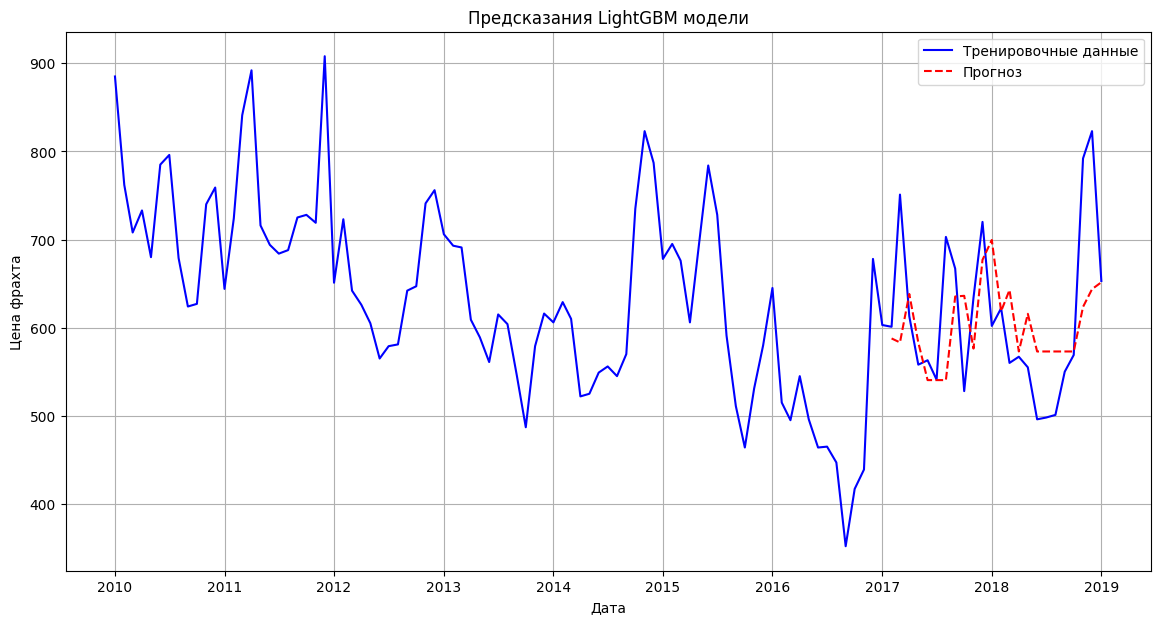

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(y.index, y, label='Тренировочные данные', color='blue')
plt.plot(y_test.index, y_pred_best_lgb, label='Прогноз', color='red', linestyle='--')
plt.title('Предсказания LightGBM модели')
plt.xlabel('Дата')
plt.ylabel('Цена фрахта')
plt.legend()
plt.grid(True)
plt.show()